In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
hyd_rent_df = pd.read_csv('hyd_v2.csv')
hyd_rent_df.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [4]:
hyd_rent_df.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

In [5]:
df= hyd_rent_df[['localityId','type_bhk','balconies', 'bathroom','parking', 'lift','furnishingDesc','maintenanceAmount',
                      'property_size','rent_amount']]
df.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,maintenanceAmount,property_size,rent_amount
0,gachibowli_hyderabad,BHK3,3,3,BOTH,True,Semi,2000,2200,28000
1,chandrayangutta_hyderabad,BHK3,1,2,TWO_WHEELER,False,Unfurnished,None,1200,15000
2,manikonda_hyderabad,BHK3,3,3,BOTH,True,Semi,1000,1800,16000
3,NOT_FOUND,BHK2,1,2,BOTH,False,Unfurnished,500,750,9000
4,hitech_city_hyderabad,BHK2,2,2,BOTH,True,Semi,2000,1250,32500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   localityId         19110 non-null  object
 1   type_bhk           19110 non-null  object
 2   balconies          19110 non-null  object
 3   bathroom           19110 non-null  int64 
 4   parking            19110 non-null  object
 5   lift               19110 non-null  bool  
 6   furnishingDesc     19110 non-null  object
 7   maintenanceAmount  19110 non-null  object
 8   property_size      19110 non-null  int64 
 9   rent_amount        19110 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 1.3+ MB


In [7]:
df.localityId.unique()

array(['gachibowli_hyderabad', 'chandrayangutta_hyderabad',
       'manikonda_hyderabad', 'NOT_FOUND', 'hitech_city_hyderabad',
       'serilingampally_hyderabad', 'nanakram_guda_hyderabad',
       'toli_chowki_hyderabad', 'yousufguda_hyderabad',
       'mehdipatnam_hyderabad', 'kondapur_hyderabad',
       'kukatpally_hyderabad', 'hafeezpet_hyderabad',
       'new_malakpet_hyderabad', 'banjara_hills_hyderabad',
       'himayath_nagar_hyderabad', 'upparpally_hyderabad',
       'shaikpet_hyderabad', 'mettakanigudem_hyderabad',
       'dammaiguda_hyderabad', 'kokapet_hyderabad', 'attapur_hyderabad',
       'west_marredpally_hyderabad', 'miyapur_hyderabad',
       'shilpa_hills_hyderabad', 'qutub_shahi_tombs_hyderabad',
       'kothaguda_hyderabad', 'somajiguda_hyderabad',
       'madhapur_hyderabad', 'gopanapalli_thanda_hyderabad',
       'chintalakunta_hyderabad',
       'bharat_heavy_electricals_limited_hyderabad',
       'peeramcheru_hyderabad', 'narsingi_hyderabad',
       'zamistanpu

In [8]:
df.type_bhk.value_counts()

BHK2        9242
BHK3        4229
BHK1        4221
RK1         1149
BHK4         211
BHK4PLUS      58
Name: type_bhk, dtype: int64

In [9]:
df.isnull().sum()

localityId           0
type_bhk             0
balconies            0
bathroom             0
parking              0
lift                 0
furnishingDesc       0
maintenanceAmount    0
property_size        0
rent_amount          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
print(df.bathroom.unique())
print(df.balconies.unique())
print(df.parking.unique())
print(df.furnishingDesc.unique())

[ 3  2  1  4  5  7  6  8 12 14]
['3' '1' '2' '0' 'None' '4' '5' '120' '12' '6' '110']
['BOTH' 'TWO_WHEELER' 'FOUR_WHEELER' 'NONE']
['Semi' 'Unfurnished' 'Full']


In [12]:
df.replace({'parking':{'NONE':0,'TWO_WHEELER':1,'FOUR_WHEELER':2,'BOTH':3}},inplace=True)
df.replace({'lift':{'False':0,'True':1}},inplace=True)
df.replace({'furnishingDesc':{'Unfurnished':0,'Semi':0.5,'Full':1}},inplace=True)
df.replace({'type_bhk':{'RK1':0.5,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}},inplace=True)
df.replace({'maintenanceAmount':{'None':int(0)}},inplace=True)

In [13]:
df.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,maintenanceAmount,property_size,rent_amount
0,gachibowli_hyderabad,3.0,3,3,3,True,0.5,2000,2200,28000
1,chandrayangutta_hyderabad,3.0,1,2,1,False,0.0,0,1200,15000
2,manikonda_hyderabad,3.0,3,3,3,True,0.5,1000,1800,16000
3,NOT_FOUND,2.0,1,2,3,False,0.0,500,750,9000
4,hitech_city_hyderabad,2.0,2,2,3,True,0.5,2000,1250,32500


In [14]:
df.lift= df.lift.apply(lambda x: 1 if x is True else 0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   localityId         19110 non-null  object 
 1   type_bhk           19110 non-null  float64
 2   balconies          19110 non-null  object 
 3   bathroom           19110 non-null  int64  
 4   parking            19110 non-null  int64  
 5   lift               19110 non-null  int64  
 6   furnishingDesc     19110 non-null  float64
 7   maintenanceAmount  19110 non-null  object 
 8   property_size      19110 non-null  int64  
 9   rent_amount        19110 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.5+ MB


In [16]:
df.replace({'balconies':{'None':int(0)}},inplace=True)
df['balconies'] = df['balconies'].apply(lambda x:int(x))
df['maintenance']=df['maintenanceAmount'].apply(lambda x:int(x))
df.drop(['maintenanceAmount'],axis=1,inplace= True)

In [17]:
df.head()

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance
0,gachibowli_hyderabad,3.0,3,3,3,1,0.5,2200,28000,2000
1,chandrayangutta_hyderabad,3.0,1,2,1,0,0.0,1200,15000,0
2,manikonda_hyderabad,3.0,3,3,3,1,0.5,1800,16000,1000
3,NOT_FOUND,2.0,1,2,3,0,0.0,750,9000,500
4,hitech_city_hyderabad,2.0,2,2,3,1,0.5,1250,32500,2000


In [18]:
df.describe()

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance
count,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000,19110.000000
mean,1.941418,0.742491,1.911826,2.014076,0.319990,0.307718,1067.674411,14919.719362,809.927682
std,0.803456,1.682343,0.764841,1.043941,0.466484,0.315218,549.019152,9623.547307,1345.363049
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,700.000000,8999.000000,0.000000
50%,2.000000,0.000000,2.000000,3.000000,0.000000,0.500000,1000.000000,12500.000000,0.000000
75%,2.000000,1.000000,2.000000,3.000000,1.000000,0.500000,1334.000000,18000.000000,1300.000000
max,5.000000,120.000000,14.000000,3.000000,1.000000,1.000000,12000.000000,100000.000000,32000.000000


In [19]:
locality_stats=df.groupby('localityId')['localityId'].count().sort_values(ascending=False)
locality_stats

localityId
NOT_FOUND                                 3491
kondapur_hyderabad                        1338
kukatpally_hyderabad                      1146
miyapur_hyderabad                          721
hafeezpet_hyderabad                        663
                                          ... 
maharaja_ranjeet_singh_nagar_hyderabad       1
majeedpur_hyderabad                          1
chanchalguda_hyderabad                       1
east_bahadurpura_hyderabad                   1
asmangadh_hyderabad                          1
Name: localityId, Length: 269, dtype: int64

In [20]:
loc_less_than_10= locality_stats[locality_stats<=10]
loc_less_than_10

localityId
bairagiguda_hyderabad                     10
nampally_hyderabad                        10
kanchan_bagh_hyderabad                    10
koti_hyderabad                            10
auto_nagar_hyderabad                      10
                                          ..
maharaja_ranjeet_singh_nagar_hyderabad     1
majeedpur_hyderabad                        1
chanchalguda_hyderabad                     1
east_bahadurpura_hyderabad                 1
asmangadh_hyderabad                        1
Name: localityId, Length: 119, dtype: int64

In [21]:
df['localityId']= df['localityId'].apply(lambda x: 'Not_Found' if x in loc_less_than_10 else x)
df.localityId.value_counts()

NOT_FOUND                     3491
kondapur_hyderabad            1338
kukatpally_hyderabad          1146
miyapur_hyderabad              721
hafeezpet_hyderabad            663
                              ... 
sri_nagar_colony_hyderabad      11
tukaram_gate_hyderabad          11
gurram_guda_hyderabad           11
kuntloor_hyderabad              11
buddha_nagar_hyderabad          11
Name: localityId, Length: 151, dtype: int64

In [22]:
df['localityId'] = df['localityId'].replace('Not_Found','NOT_FOUND')

## Feature Engineering

In [23]:
df['rent_per_sqft'] = df['rent_amount'] /df['property_size']
df

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,gachibowli_hyderabad,3.0,3,3,3,1,0.5,2200,28000,2000,12.727273
1,NOT_FOUND,3.0,1,2,1,0,0.0,1200,15000,0,12.500000
2,manikonda_hyderabad,3.0,3,3,3,1,0.5,1800,16000,1000,8.888889
3,NOT_FOUND,2.0,1,2,3,0,0.0,750,9000,500,12.000000
4,hitech_city_hyderabad,2.0,2,2,3,1,0.5,1250,32500,2000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...
19105,rai_durg_hyderabad,1.0,0,1,3,1,0.0,500,8500,500,17.000000
19106,NOT_FOUND,2.0,2,2,3,0,0.0,900,8500,500,9.444444
19107,moosapet_hyderabad,2.0,0,3,3,0,0.0,1150,15000,0,13.043478
19108,NOT_FOUND,1.0,0,1,1,0,0.0,500,7000,0,14.000000


In [24]:
def remove_rps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('localityId'):
        m=np.mean(subdf.rent_per_sqft)
        st=np.std(subdf.rent_per_sqft) 
        reduced_df=subdf[(subdf.rent_per_sqft>(m-st))&(subdf.rent_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [25]:
df1= remove_rps_outliers(df)
df1.shape

(10394, 11)

In [26]:
df2= df1[df1['balconies']<12]
df2

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,adikmet_hyderabad,2.0,1,2,1,0,0.0,900,10000,0,11.111111
1,adikmet_hyderabad,3.0,2,3,3,1,0.5,1780,30000,3560,16.853933
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
3,adikmet_hyderabad,2.0,1,2,1,0,0.5,1050,12000,1200,11.428571
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
...,...,...,...,...,...,...,...,...,...,...,...
10389,zamistanpur_hyderabad,2.0,2,2,3,1,0.0,1000,12000,1000,12.000000
10390,zamistanpur_hyderabad,2.0,0,1,3,0,0.0,720,9000,0,12.500000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000
10392,zamistanpur_hyderabad,2.0,2,2,1,0,0.5,1010,16000,1000,15.841584


In [27]:
df3=df2[df2['bathroom']<= df2.type_bhk+1]
df3

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,adikmet_hyderabad,2.0,1,2,1,0,0.0,900,10000,0,11.111111
1,adikmet_hyderabad,3.0,2,3,3,1,0.5,1780,30000,3560,16.853933
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
3,adikmet_hyderabad,2.0,1,2,1,0,0.5,1050,12000,1200,11.428571
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
...,...,...,...,...,...,...,...,...,...,...,...
10389,zamistanpur_hyderabad,2.0,2,2,3,1,0.0,1000,12000,1000,12.000000
10390,zamistanpur_hyderabad,2.0,0,1,3,0,0.0,720,9000,0,12.500000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000
10392,zamistanpur_hyderabad,2.0,2,2,1,0,0.5,1010,16000,1000,15.841584


In [28]:
df4= df3[df3['property_size']>300]
df4

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,adikmet_hyderabad,2.0,1,2,1,0,0.0,900,10000,0,11.111111
1,adikmet_hyderabad,3.0,2,3,3,1,0.5,1780,30000,3560,16.853933
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
3,adikmet_hyderabad,2.0,1,2,1,0,0.5,1050,12000,1200,11.428571
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
...,...,...,...,...,...,...,...,...,...,...,...
10388,zamistanpur_hyderabad,1.0,2,2,3,0,0.0,500,8000,0,16.000000
10389,zamistanpur_hyderabad,2.0,2,2,3,1,0.0,1000,12000,1000,12.000000
10390,zamistanpur_hyderabad,2.0,0,1,3,0,0.0,720,9000,0,12.500000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000


In [29]:
df5 = df4[(df4['maintenance'] >= 0.0) & (df4['maintenance'] <= 0.1 * df4['rent_amount'])]
df5

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,adikmet_hyderabad,2.0,1,2,1,0,0.0,900,10000,0,11.111111
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
3,adikmet_hyderabad,2.0,1,2,1,0,0.5,1050,12000,1200,11.428571
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
5,adikmet_hyderabad,2.0,2,2,3,0,0.5,1000,13000,1000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
10388,zamistanpur_hyderabad,1.0,2,2,3,0,0.0,500,8000,0,16.000000
10389,zamistanpur_hyderabad,2.0,2,2,3,1,0.0,1000,12000,1000,12.000000
10390,zamistanpur_hyderabad,2.0,0,1,3,0,0.0,720,9000,0,12.500000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000


In [30]:
df6= df5[df5['localityId'] != 'NOT_FOUND'  ]
df6

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
0,adikmet_hyderabad,2.0,1,2,1,0,0.0,900,10000,0,11.111111
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
3,adikmet_hyderabad,2.0,1,2,1,0,0.5,1050,12000,1200,11.428571
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
5,adikmet_hyderabad,2.0,2,2,3,0,0.5,1000,13000,1000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...
10388,zamistanpur_hyderabad,1.0,2,2,3,0,0.0,500,8000,0,16.000000
10389,zamistanpur_hyderabad,2.0,2,2,3,1,0.0,1000,12000,1000,12.000000
10390,zamistanpur_hyderabad,2.0,0,1,3,0,0.0,720,9000,0,12.500000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000


In [31]:
df6.describe()

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
count,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,8540.00000,8540.000000,8540.000000
mean,1.942037,0.697775,1.881967,1.938525,0.267564,0.283724,1048.195550,14195.38911,488.584543,13.616811
std,0.724353,0.915505,0.688437,1.045556,0.442715,0.305326,459.224519,8172.39062,734.008272,4.035462
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,310.000000,2500.00000,0.000000,3.250000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,700.000000,9000.00000,0.000000,10.833333
50%,2.000000,0.000000,2.000000,2.000000,0.000000,0.500000,1000.000000,12000.00000,0.000000,13.125000
75%,2.000000,1.000000,2.000000,3.000000,1.000000,0.500000,1250.000000,17000.00000,1000.000000,16.000000
max,5.000000,5.000000,6.000000,3.000000,1.000000,1.000000,7000.000000,100000.00000,8500.000000,40.000000


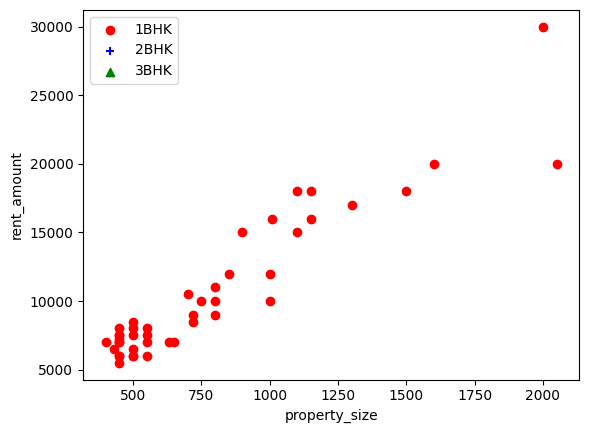

In [32]:
def plot_scatter_chart(df,localityId):
    bhk1= df[(df.localityId== localityId) & df.type_bhk==1.0]
    bhk2= df[(df.localityId== localityId) & df.type_bhk==2.0]    
    bhk3= df[(df.localityId== localityId) & df.type_bhk==3.0]    
    #bhk4= df[(df.localityId== location) & df.type_bhk==4]
    
    plt.scatter(bhk1.property_size,bhk1.rent_amount,color='red',label='1BHK')
    plt.scatter(bhk2.property_size,bhk2.rent_amount,marker='+',color='blue',label='2BHK')    
    plt.scatter(bhk3.property_size,bhk3.rent_amount,marker='^',color='green',label='3BHK')    
    #plt.scatter(bhk4.property_size,bhk4.rent_amount,marker='*',color='yellow',label='4BHK')   
    plt.xlabel('property_size')
    plt.ylabel('rent_amount')
    
    plt.legend()

plot_scatter_chart(df6,'zamistanpur_hyderabad')

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locality, locality_df in df.groupby('localityId'):
        bhk_stats = {}
        for bhk, bhk_df in locality_df.groupby('type_bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.rent_per_sqft),
                'std': np.std(bhk_df.rent_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in locality_df.groupby('type_bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.rent_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7

,localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,rent_per_sqft
2,adikmet_hyderabad,2.0,1,2,1,0,0.0,680,10000,0,14.705882
4,adikmet_hyderabad,2.0,2,1,1,0,0.0,600,9500,0,15.833333
6,adikmet_hyderabad,1.0,0,1,0,0,0.5,500,8500,0,17.000000
9,adikmet_hyderabad,0.5,1,1,3,0,0.0,400,7000,0,17.500000
11,adikmet_hyderabad,2.0,0,1,1,0,0.5,800,12000,1000,15.000000
...,...,...,...,...,...,...,...,...,...,...,...
10384,zamistanpur_hyderabad,1.0,1,1,1,0,0.5,450,7000,0,15.555556
10387,zamistanpur_hyderabad,2.0,1,1,1,0,0.5,700,10500,500,15.000000
10388,zamistanpur_hyderabad,1.0,2,2,3,0,0.0,500,8000,0,16.000000
10391,zamistanpur_hyderabad,1.0,0,1,3,0,0.0,500,6000,0,12.000000


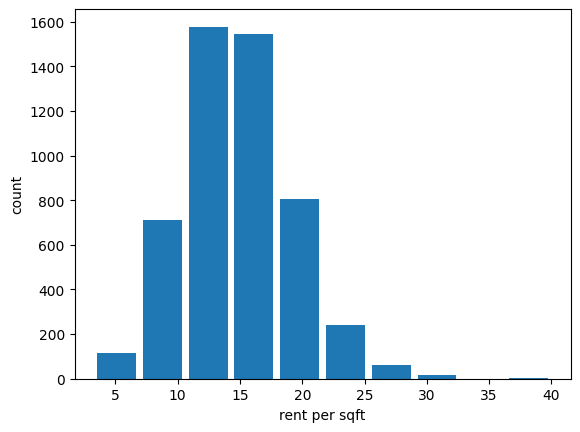

In [34]:
plt.hist(df7.rent_per_sqft,rwidth=0.85)
plt.xlabel('rent per sqft')
plt.ylabel('count')

plt.show()

In [35]:
df8= df7.drop('rent_per_sqft',axis=1)
df8.property_size.sort_values()

8848     310
8847     310
3491     340
5987     340
3259     350
        ... 
6715    4000
3541    4000
9536    5000
6576    5500
7133    7000
Name: property_size, Length: 5075, dtype: int64

In [48]:
df8.to_csv('cleaned.csv')

In [37]:
dummies= pd.get_dummies(df8.localityId)
dummies.head()

,adikmet_hyderabad,almasguda_hyderabad,amberpet_hyderabad,ameerpet_hyderabad,attapur_hyderabad,badangpet_hyderabad,badesahebguda_hyderabad,balakampet_hyderabad,balanagar_hyderabad,balapur_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9= pd.concat([df8.drop('localityId',axis=1),dummies],axis=1)
df9

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,adikmet_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
2,2.0,1,2,1,0,0.0,680,10000,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1,1,0,0.0,600,9500,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,1,0,0,0.5,500,8500,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0.5,1,1,3,0,0.0,400,7000,0,1,...,0,0,0,0,0,0,0,0,0,0
11,2.0,0,1,1,0,0.5,800,12000,1000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,1.0,1,1,1,0,0.5,450,7000,0,0,...,0,0,0,0,0,0,0,0,0,1
10387,2.0,1,1,1,0,0.5,700,10500,500,0,...,0,0,0,0,0,0,0,0,0,1
10388,1.0,2,2,3,0,0.0,500,8000,0,0,...,0,0,0,0,0,0,0,0,0,1
10391,1.0,0,1,3,0,0.0,500,6000,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df9.describe()

,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,rent_amount,maintenance,adikmet_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
count,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,...,5075.000000,5075.000000,5075.000000,5075.00000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000
mean,1.731232,0.657143,1.706798,1.833498,0.246700,0.274483,932.582857,13906.285517,433.987783,0.004335,...,0.001576,0.011034,0.004729,0.00197,0.003941,0.003350,0.002365,0.004532,0.015369,0.006108
std,0.794567,0.872366,0.737224,1.052458,0.431133,0.311596,477.457227,9284.554994,747.102893,0.065704,...,0.039676,0.104474,0.068612,0.04435,0.062659,0.057786,0.048574,0.067174,0.123029,0.077925
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,310.000000,2500.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,550.000000,8000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,850.000000,11000.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,2.000000,3.000000,0.000000,0.500000,1180.500000,17000.000000,600.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,6.000000,3.000000,1.000000,1.000000,7000.000000,100000.000000,8500.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [40]:
X = df9.drop('rent_amount',axis=1)
y = df9.rent_amount

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
Lr= LinearRegression()
Lr.fit(X_train,y_train)
Lr.score(X_test,y_test)

0.8842313328896617

In [43]:
from sklearn.linear_model import Lasso
Ls= Lasso()
Ls.fit(X_train,y_train)
Ls.score(X_test,y_test)

0.881978262724253

In [44]:
from sklearn.linear_model import Ridge
Rd= Ridge()
Rd.fit(X_train,y_train)
Rd.score(X_test,y_test)

0.8839860605546966

In [45]:
def predict_price(localityId,type_bhk,balconies,bathroom,parking,lift,furnishingDesc,property_size,maintenance):
    
    loc_index = np.where(X.columns==localityId)[0][0] 
    x= np.zeros(len(X.columns))
    x[0]=type_bhk
    x[1]=balconies
    x[2]=bathroom
    x[3]=parking
    x[4]=lift
    x[5]=furnishingDesc
    x[6]=property_size
    x[7]=maintenance
    #scaled_X= scaler.fit_transform(x)
    
    if loc_index>=0:
        x[loc_index]=1 
    
    return Lr.predict([x])[0]


In [46]:
predict_price('zamistanpur_hyderabad',5,5,4,3,1,1,5000,1000)

74520.40087890625

In [47]:
import pickle
with open('hyd_house_rent_prices.pickle','wb') as f:
    pickle.dump(Lr,f)